## Raghav Gupta E19CSE258

In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as snb
from scipy import stats
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

## Reading Data , handling null data if any and performing Label Encoding

In [147]:
data = pd.read_csv('./Algerian_forest_fires_dataset.csv')

In [148]:
data.head()

,day,month,year,Region,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,Bejaia Region Dataset,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,Bejaia Region Dataset,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,3,6,2012,Bejaia Region Dataset,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,Bejaia Region Dataset,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire
4,5,6,2012,Bejaia Region Dataset,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire


In [149]:
data.isnull().sum()

day            0
month          0
year           0
Region         0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
dtype: int64

In [150]:
le = LabelEncoder()
data['Region'] = le.fit_transform(data[['Region']])
print(le.classes_)
print(le.get_params)

['Bejaia Region Dataset ' 'Sidi-Bel Abbes Region Dataset']
<bound method BaseEstimator.get_params of LabelEncoder()>


/home/lord/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [151]:
arr = []
for i in data['Classes  ']:
    i = i.split(' ')
    arr.append(i[0])
data['Classes  '] = np.array(arr)

In [152]:
data['Classes  '] = le.fit_transform(data[['Classes  ']])
print(le.classes_)
print(le.get_params)

['fire' 'not']
<bound method BaseEstimator.get_params of LabelEncoder()>


In [153]:
data.drop('year',inplace=True,axis=1)
data.head(6)

,day,month,Region,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,1
1,2,6,0,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,1
2,3,6,0,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,1
3,4,6,0,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,1
4,5,6,0,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,1
5,6,6,0,31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5,0


## Visualising the data

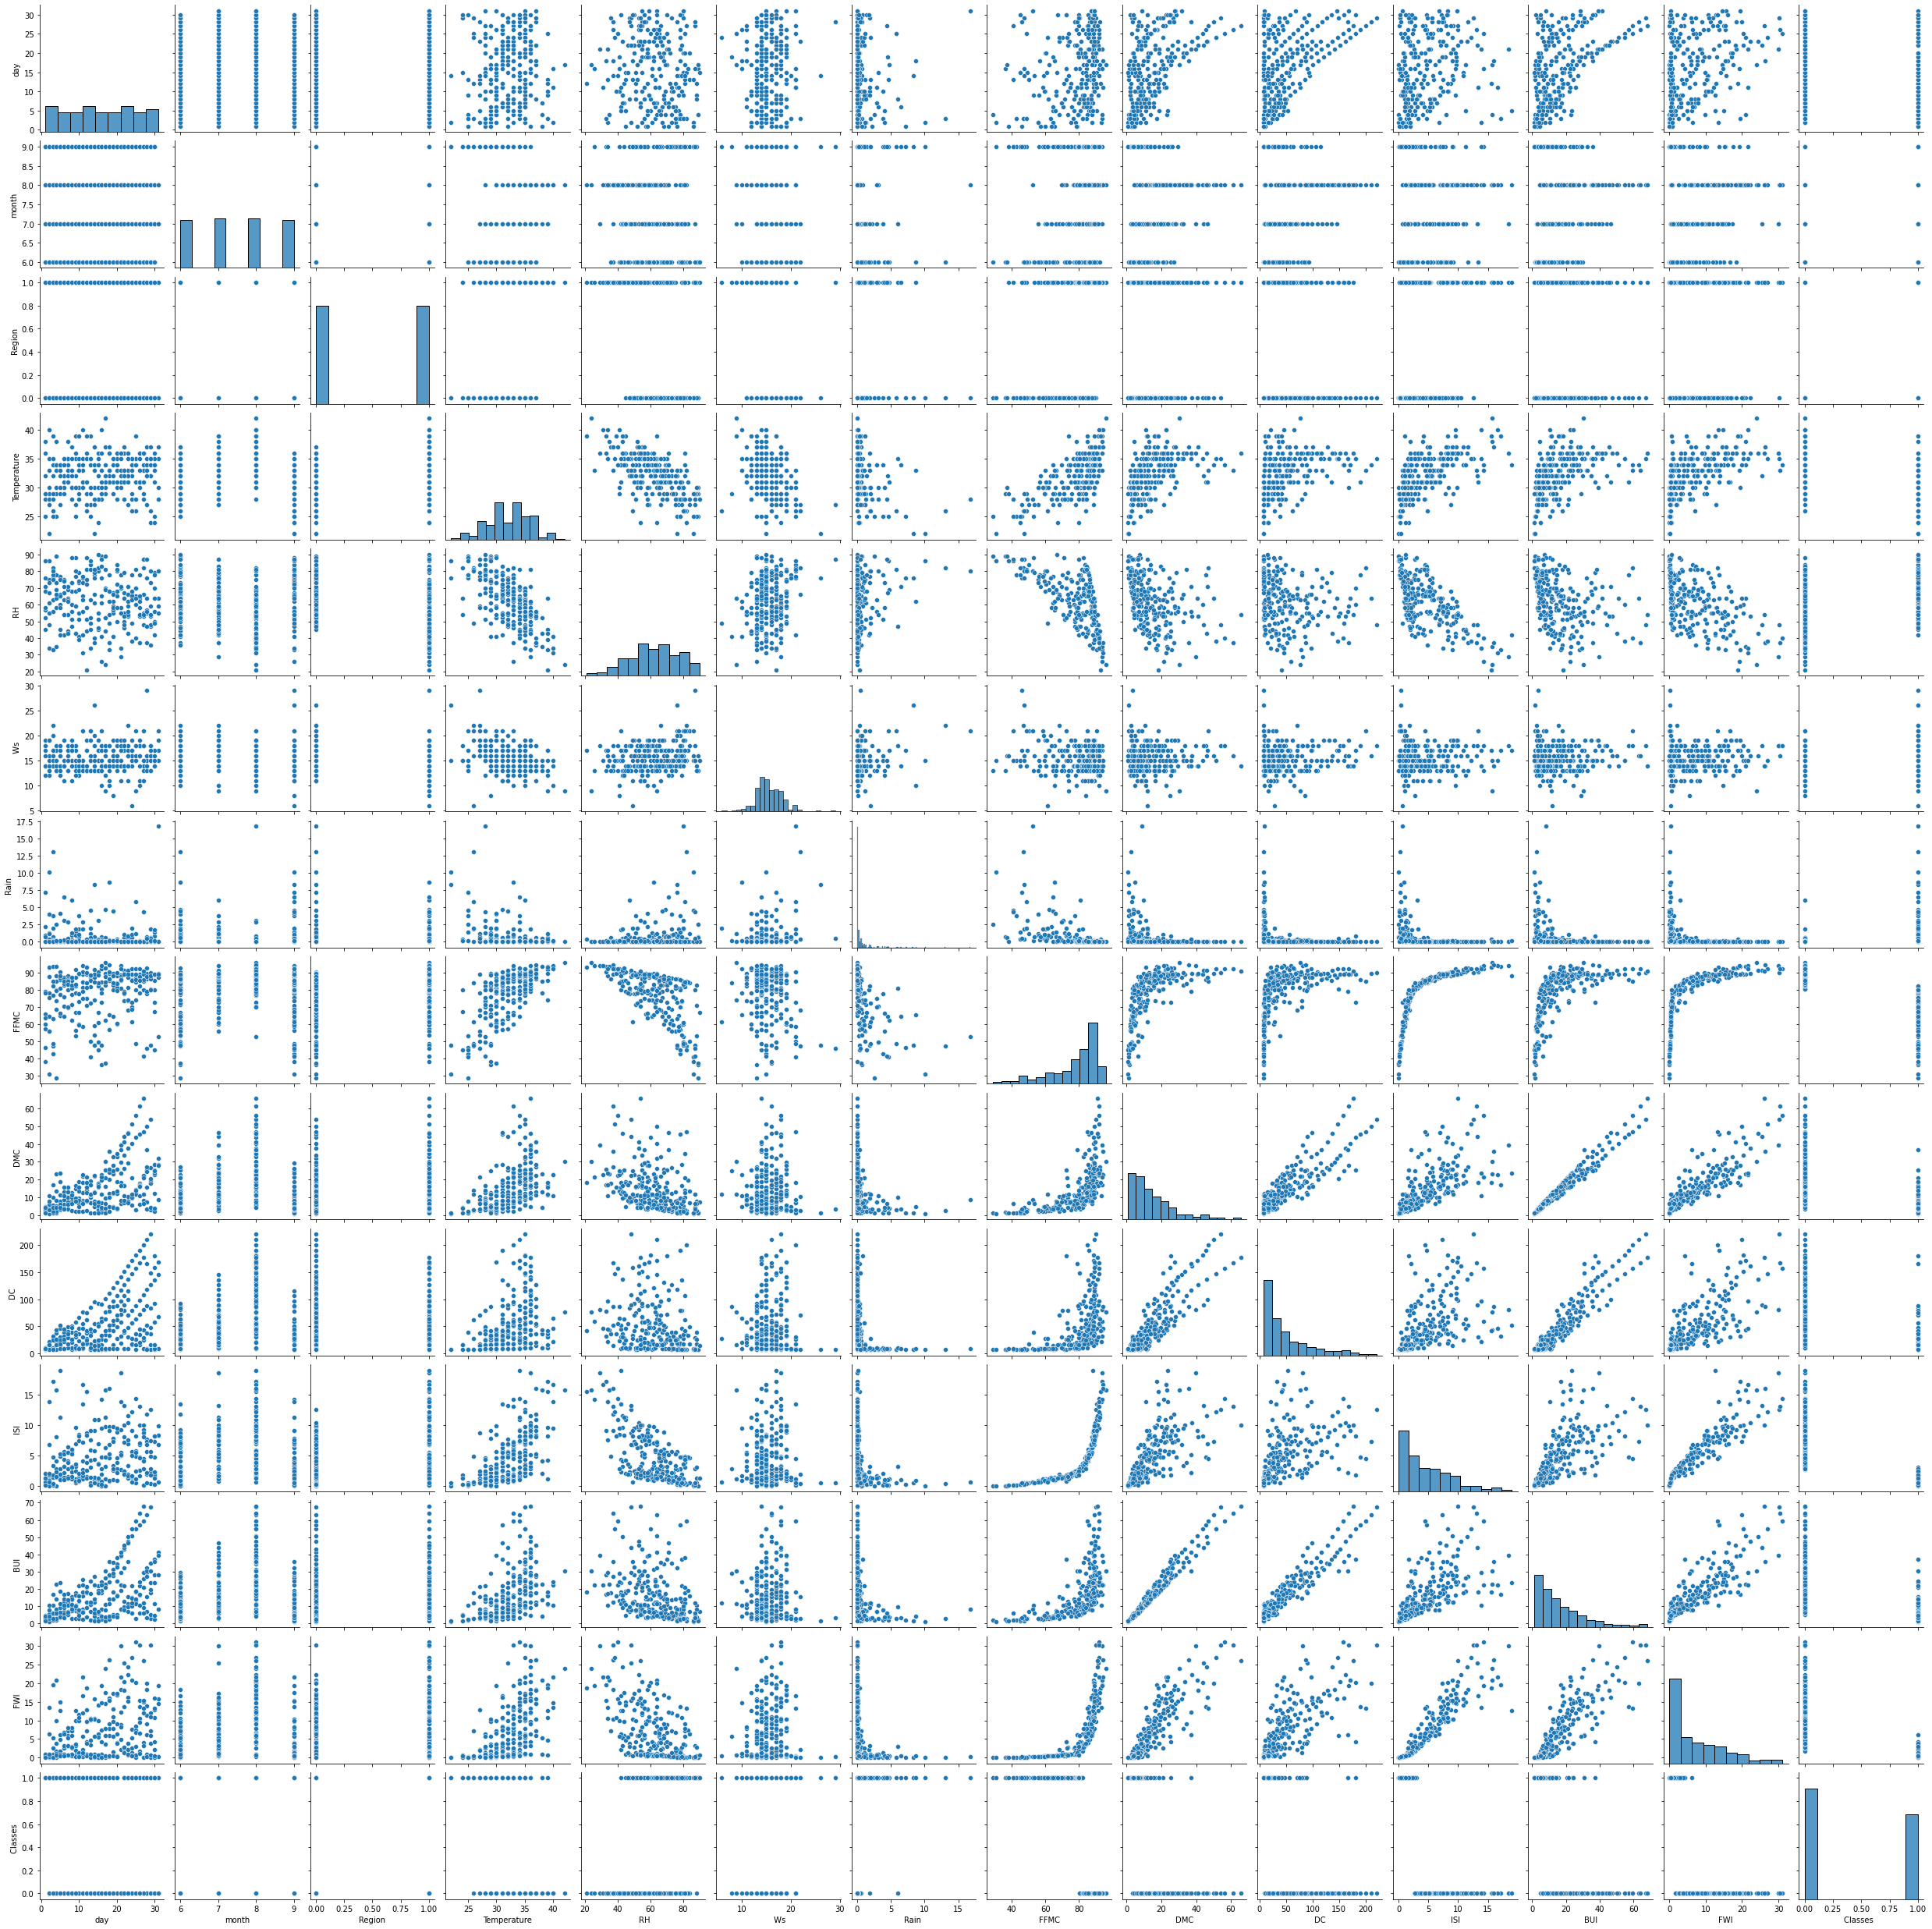

In [154]:
# uncomment the line below to see pairplot. Runnig it takes around 50 sec
# snb.pairplot(data)

<AxesSubplot:>

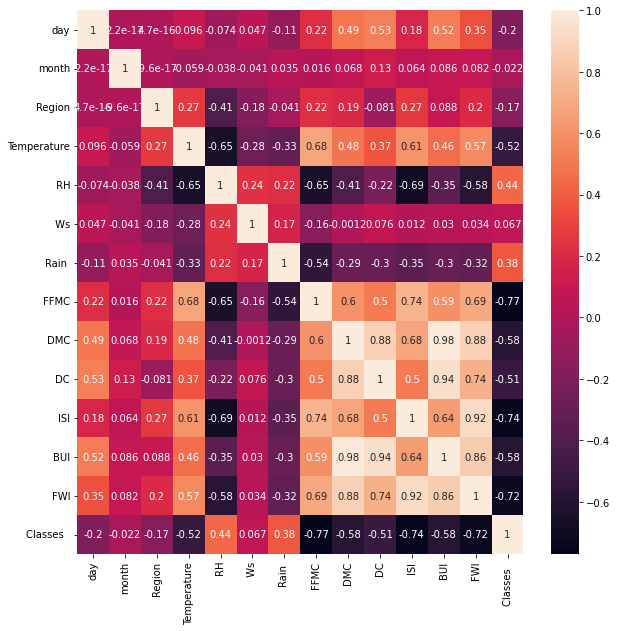

In [155]:
plt.figure(figsize=(10,10))
snb.heatmap(data.corr(),annot=True)

In [156]:
def checkForOutliers():
    for i in data.columns:
        plt.xlabel(i)
        plt.boxplot(data[i])
        plt.show()

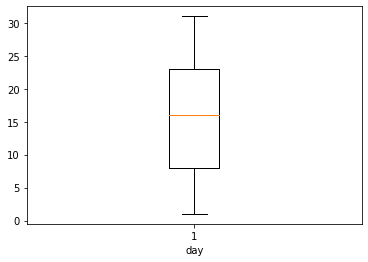

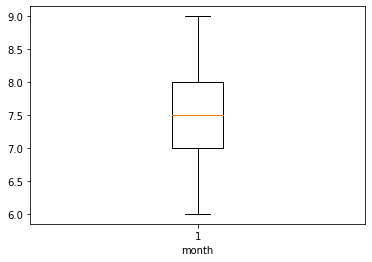

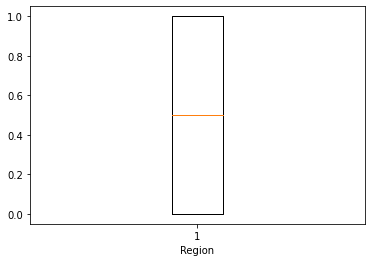

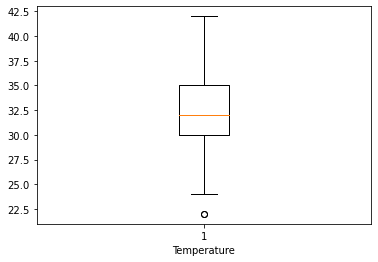

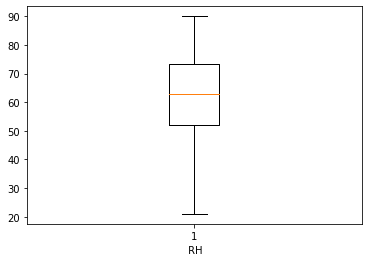

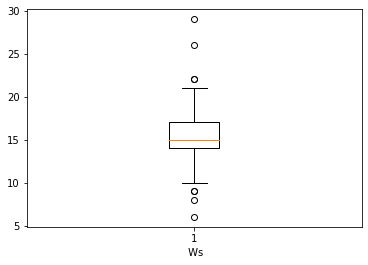

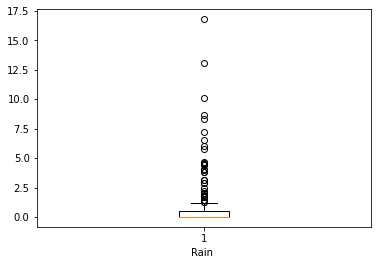

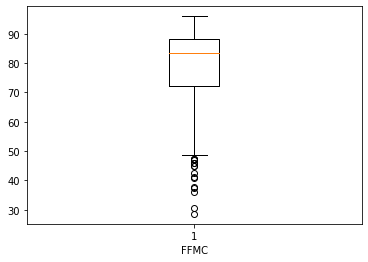

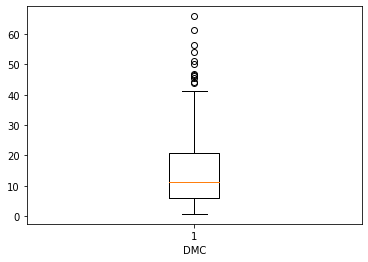

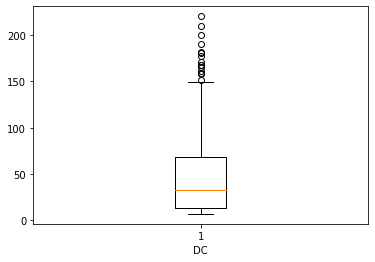

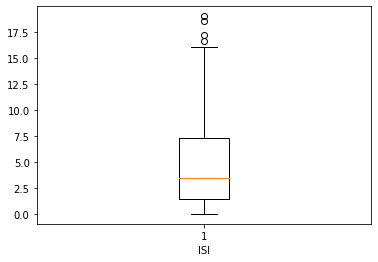

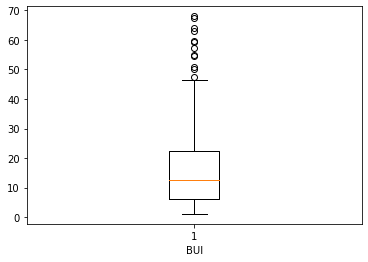

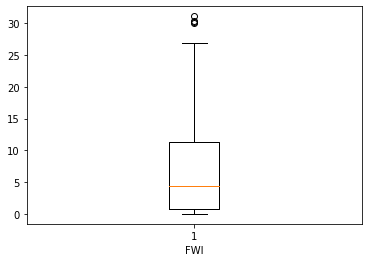

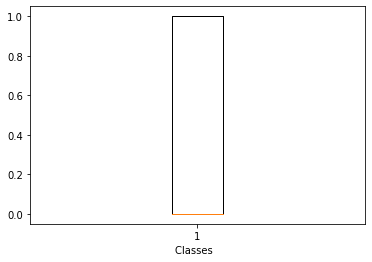

In [157]:
checkForOutliers()

we have outliers in the following columns :-
- 'Temperature'
- ' Ws'
- 'Rain '
- 'FFMC'
- 'DMC'
- 'DC'
- 'ISI'
- 'BUI'

In [158]:
outlierColumns = ['Temperature',' Ws','Rain ','FFMC','DMC','DC','ISI','BUI']

In [159]:
def treatOutliers(arr):
    for i in arr:
        temp = stats.mstats.winsorize(data[i],limits=0.05)
        data[i] = np.array(temp)

In [160]:
treatOutliers(outlierColumns)

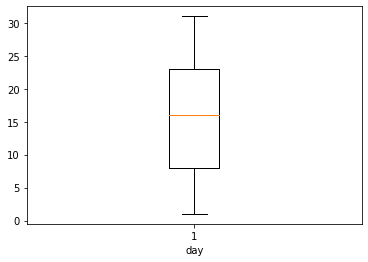

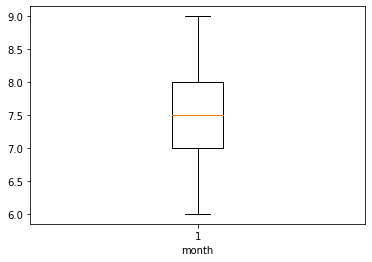

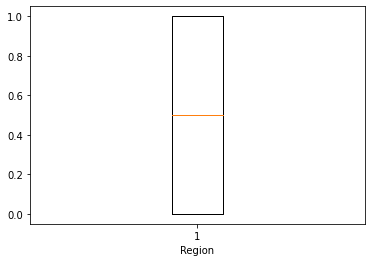

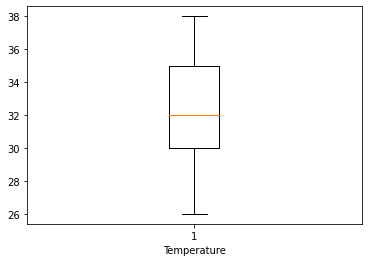

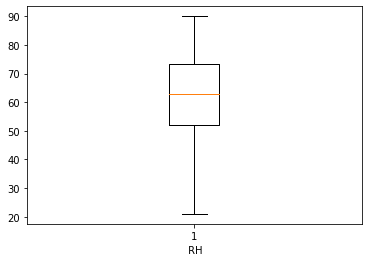

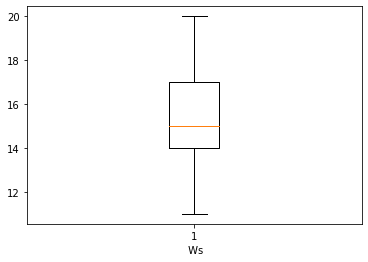

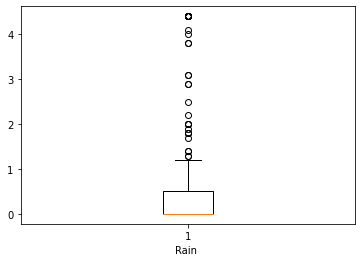

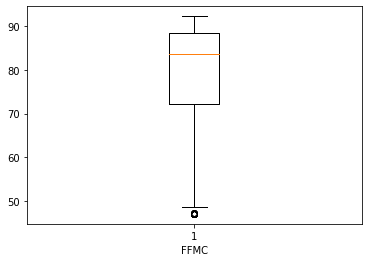

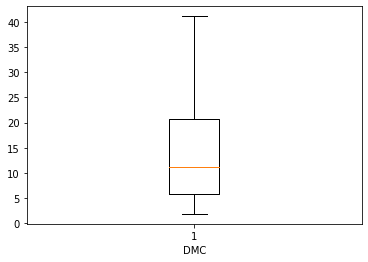

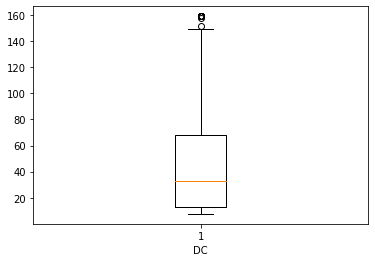

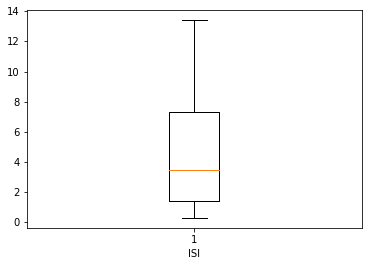

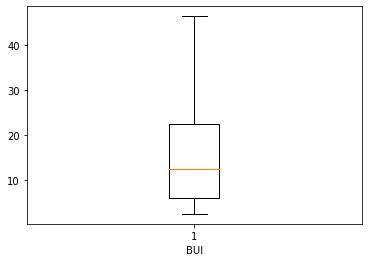

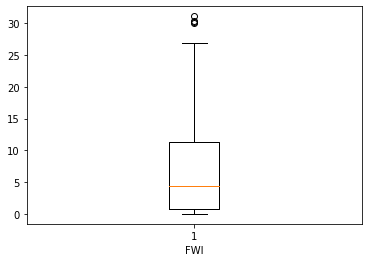

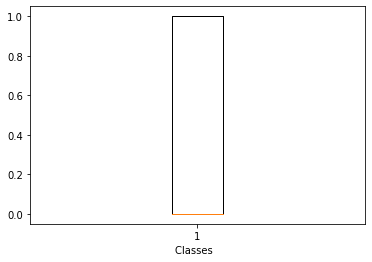

In [161]:
checkForOutliers()

## Starting With splitting then making our ML model

In [162]:
feature_names = ['day', 'month', 'Region', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI']
class_names = ['Classes  ']

In [163]:
X = data[feature_names].values
y = data[class_names].values

In [164]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=1,train_size=0.7)

In [165]:
def DecisionTree(model):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_pred , y_test))
    fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (3,3), dpi=300)
    plot_tree(model,filled = True)

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        38
           1       0.97      1.00      0.99        36

    accuracy                           0.99        74
   macro avg       0.99      0.99      0.99        74
weighted avg       0.99      0.99      0.99        74



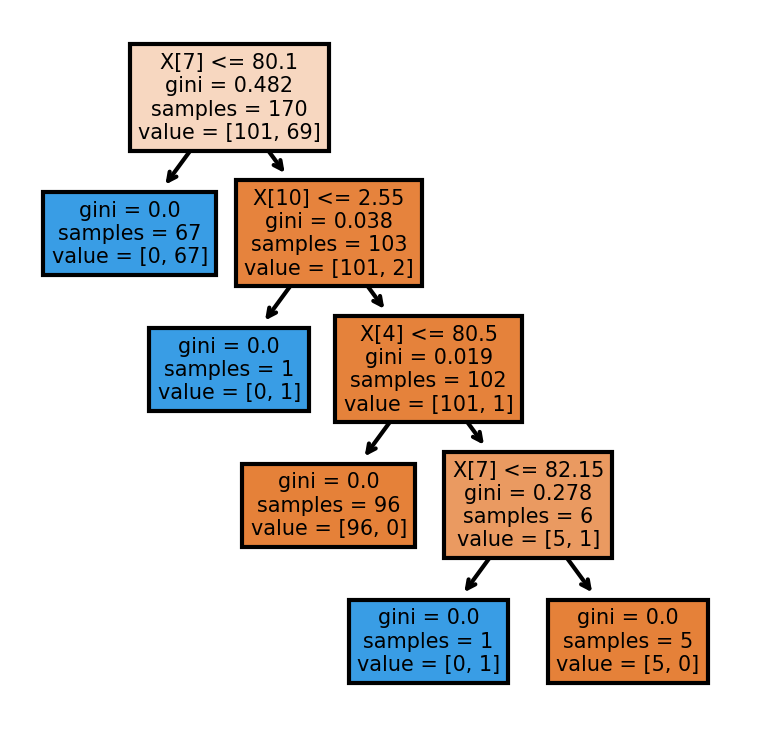

In [166]:
DecisionTree(DecisionTreeClassifier())

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        38
           1       0.97      1.00      0.99        36

    accuracy                           0.99        74
   macro avg       0.99      0.99      0.99        74
weighted avg       0.99      0.99      0.99        74



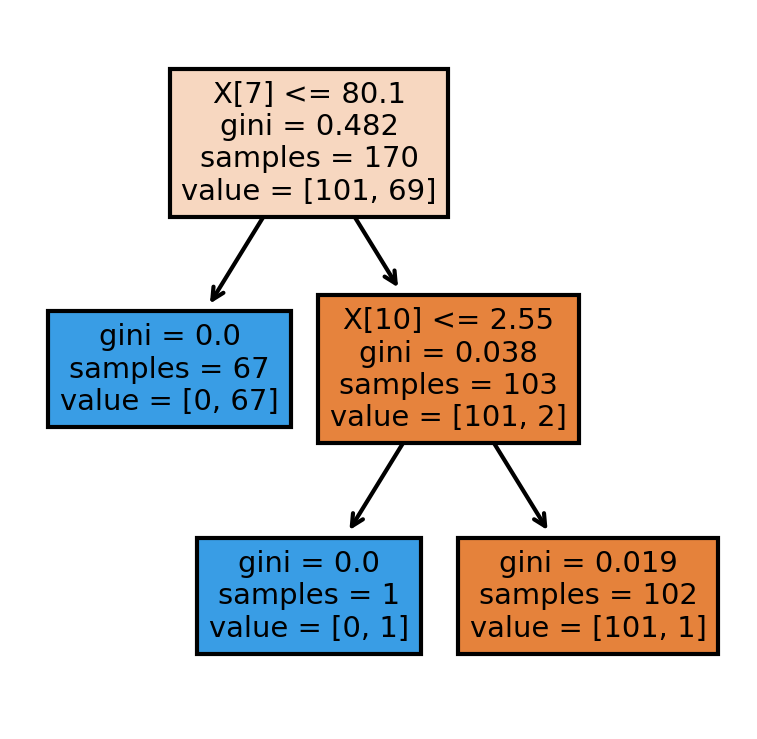

In [167]:
DecisionTree(DecisionTreeClassifier(max_depth=2))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        39
           1       0.95      1.00      0.97        35

    accuracy                           0.97        74
   macro avg       0.97      0.97      0.97        74
weighted avg       0.97      0.97      0.97        74



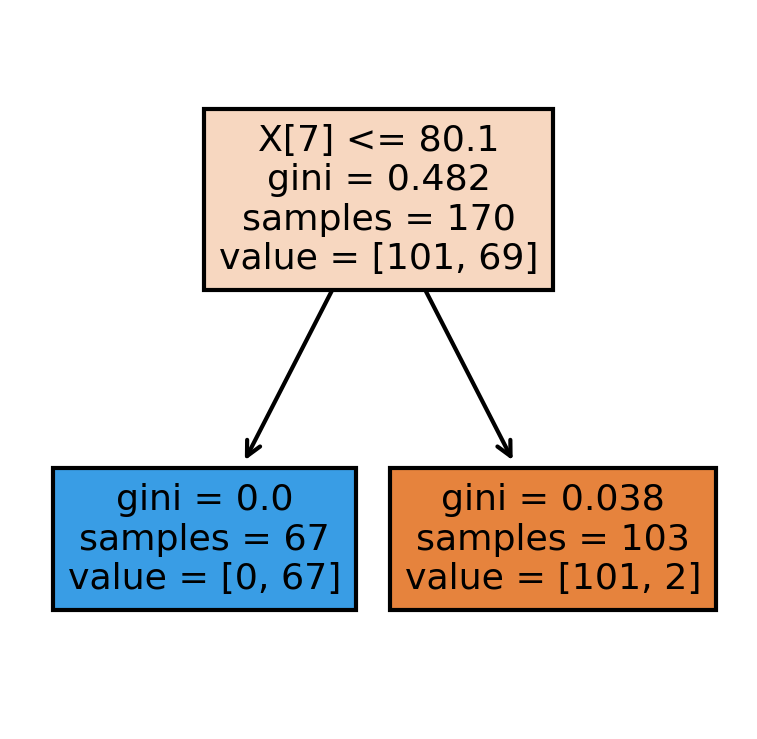

In [168]:
DecisionTree(DecisionTreeClassifier(max_depth=1))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        41
           1       0.89      1.00      0.94        33

    accuracy                           0.95        74
   macro avg       0.95      0.95      0.95        74
weighted avg       0.95      0.95      0.95        74



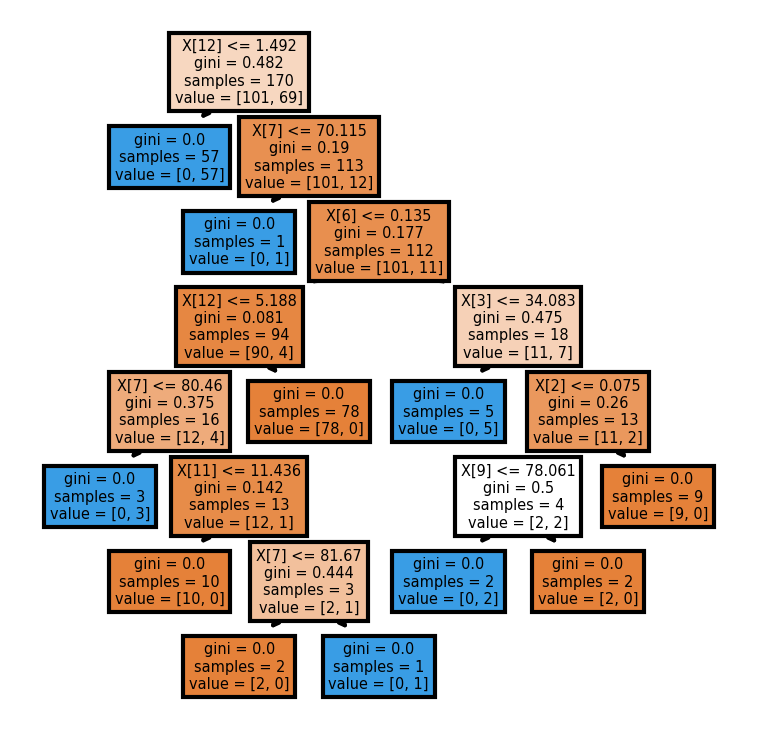

In [169]:
DecisionTree(DecisionTreeClassifier(splitter='random'))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        39
           1       0.95      1.00      0.97        35

    accuracy                           0.97        74
   macro avg       0.97      0.97      0.97        74
weighted avg       0.97      0.97      0.97        74



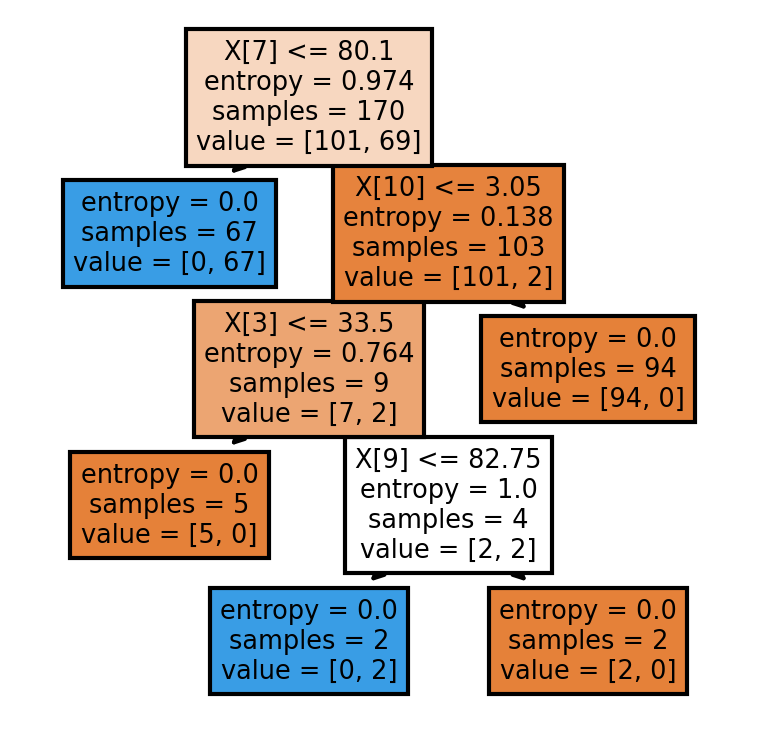

In [170]:
DecisionTree(DecisionTreeClassifier(criterion='entropy'))